## ML Lab Internal Exam - SET 1
## Name:bommanaveni chaithanya
## ID:B200874
## Class:cse-c4

## Dataset Description
The classification task of this database is to determine where patients in a postoperative recovery area (after a operation) should be sent to next. Because hypothermia is a significant concern after surgery (Woolery, L. et. al. 1991), the attributes correspond roughly to body temperature measurements. 


<b>Attribute Information:</b><br>

1. L-CORE (patient's internal temperature in C): <br>
high (> 37), mid (>= 36 and <= 37), low (< 36) <br>
2. L-SURF (patient's surface temperature in C): <br>
high (> 36.5), mid (>= 36.5 and <= 35), low (< 35) <br>
3. L-O2 (oxygen saturation in %): <br>
excellent (>= 98), good (>= 90 and < 98), fair (>= 80 and < 90), poor (< 80) <br>
4. L-BP (last measurement of blood pressure): <br>
high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70) <br> 
5. SURF-STBL (stability of patient's surface temperature): <br>
stable, mod-stable, unstable <br>
6. CORE-STBL (stability of patient's core temperature) <br>
stable, mod-stable, unstable <br>
7. BP-STBL (stability of patient's blood pressure) <br>
stable, mod-stable, unstable <br>
8. COMFORT (patient's perceived comfort at discharge, measured as an integer between 0 and 20) <br>
9. decision ADM-DECS (discharge decision): <br>
I  (patient sent to Intensive Care Unit), <br>
S (patient prepared to go home), <br>
A (patient sent to general hospital floor)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#Import Dataset - set1_data.csv 
df=pd.read_csv("set1_data.csv")
df

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15.0,A
1,mid,high,excellent,high,stable,stable,stable,10.0,S
2,high,low,excellent,high,stable,stable,mod-stable,10.0,A
3,mid,low,good,high,stable,unstable,mod-stable,15.0,A
4,mid,mid,excellent,high,stable,stable,stable,10.0,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10.0,A
86,mid,mid,excellent,mid,unstable,stable,stable,15.0,S
87,mid,mid,NaN,mid,unstable,stable,stable,15.0,A
88,mid,mid,excellent,mid,unstable,stable,stable,10.0,A


In [3]:
# Print top 5 and random 5 values - 2 Marks
print("Top 5 rows:")
print(df.head())

print("Random 5 rows:")
print(df.sample(5, random_state=1))

Top 5 rows:
  L-CORE L-SURF       L-O2  L-BP SURF-STBL CORE-STBL     BP-STBL  COMFORT  \
0    mid    low  excellent   mid    stable    stable      stable     15.0   
1    mid   high  excellent  high    stable    stable      stable     10.0   
2   high    low  excellent  high    stable    stable  mod-stable     10.0   
3    mid    low       good  high    stable  unstable  mod-stable     15.0   
4    mid    mid  excellent  high    stable    stable      stable     10.0   

  ADM-DECS  
0        A  
1        S  
2        A  
3        A  
4        A  
Random 5 rows:
   L-CORE L-SURF       L-O2  L-BP SURF-STBL CORE-STBL BP-STBL  COMFORT  \
58    low    low       good  high    stable    stable  stable     10.0   
78    mid    mid  excellent   mid  unstable  unstable  stable     10.0   
43    mid    mid       good   mid    stable    stable  stable     10.0   
55    mid    mid       good   mid  unstable    stable  stable     15.0   
87    mid    mid        NaN   mid  unstable    stable  stable 

In [4]:
#Print column names - 1 Marks
df.columns

Index(['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL',
       'COMFORT', 'ADM-DECS'],
      dtype='object')

In [5]:
#Check the data type of each column - 1 Marks
df.dtypes

L-CORE        object
L-SURF        object
L-O2          object
L-BP          object
SURF-STBL     object
CORE-STBL     object
BP-STBL       object
COMFORT      float64
ADM-DECS      object
dtype: object

In [6]:
#Print number of rows and columns 1 Mark
print("Rows ",df.shape[0])

Rows  90


In [7]:
#Print summary statistics of all variables - 1 Mark
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   L-CORE     89 non-null     object 
 1   L-SURF     90 non-null     object 
 2   L-O2       89 non-null     object 
 3   L-BP       90 non-null     object 
 4   SURF-STBL  89 non-null     object 
 5   CORE-STBL  90 non-null     object 
 6   BP-STBL    90 non-null     object 
 7   COMFORT    87 non-null     float64
 8   ADM-DECS   90 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.5+ KB


In [8]:
#Print the number of missing values in each column - 1 Marks
df.isnull().sum()

L-CORE       1
L-SURF       0
L-O2         1
L-BP         0
SURF-STBL    1
CORE-STBL    0
BP-STBL      0
COMFORT      3
ADM-DECS     0
dtype: int64

In [9]:
#Impute missing values - Replace missing categorical values with mode and numerical values with mean of the column - 3 Mark
#Print the number of missing values in each column after imputation
for col in df.columns:
    if df[col].dtype == 'object': 
        mode = df[col].mode()[0]
        df[col].fillna(mode, inplace=True)
    else: 
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)

print(df.isnull().sum())



L-CORE       0
L-SURF       0
L-O2         0
L-BP         0
SURF-STBL    0
CORE-STBL    0
BP-STBL      0
COMFORT      0
ADM-DECS     0
dtype: int64


In [10]:
#Print count of patients in each category - 1 Marks
print(df.groupby('ADM-DECS').size())
print(df['ADM-DECS'].value_counts())

ADM-DECS
A    64
I     2
S    24
dtype: int64
ADM-DECS
A    64
S    24
I     2
Name: count, dtype: int64


/home/rgukt-basar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


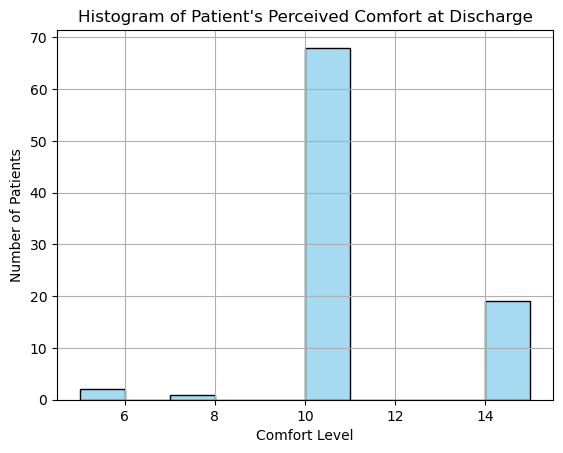

In [11]:
#Plot histogram of values of patient's perceived comfort at discharge - 1 Marks
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['COMFORT'], bins=10, kde=False, color='skyblue')
plt.title("Histogram of Patient's Perceived Comfort at Discharge")
plt.xlabel("Comfort Level")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()

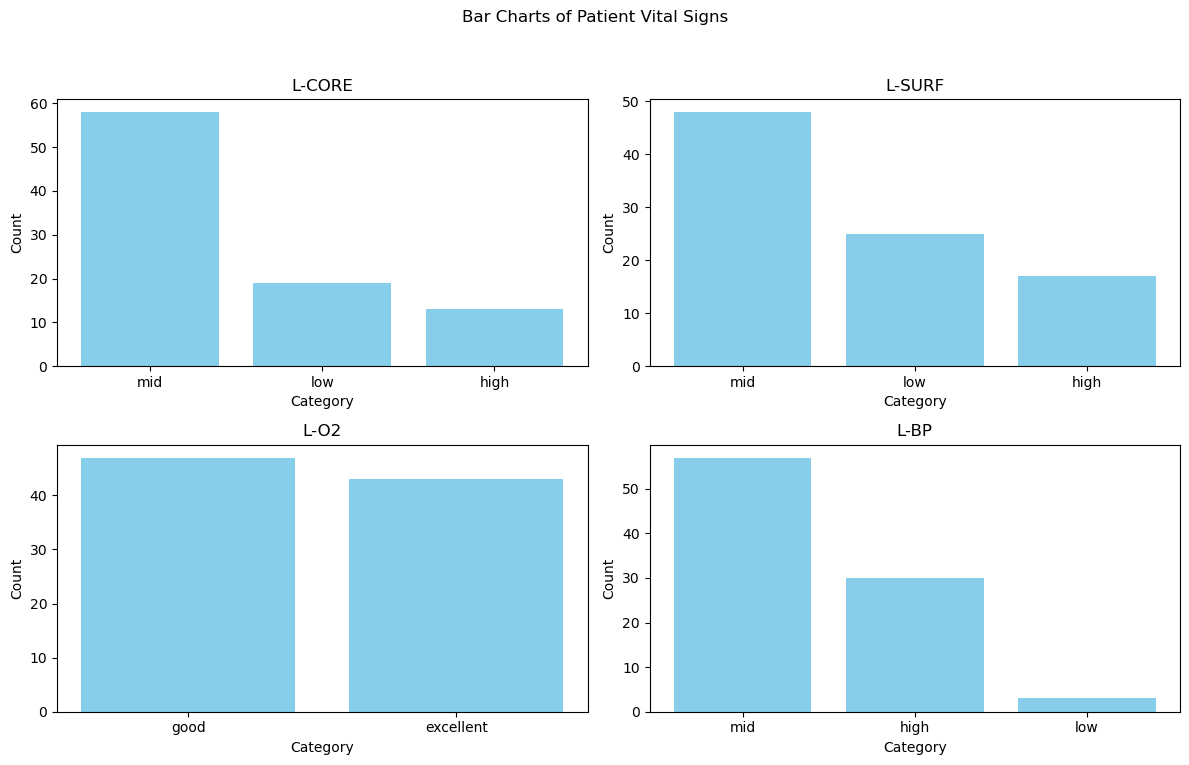

In [12]:
# Plot barchart of L-CORE, L-SURF,L-O2 and L-BP using 2X2 subplots - 3 Marks
import matplotlib.pyplot as plt
columns = ['L-CORE', 'L-SURF', 'L-O2', 'L-BP']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Bar Charts of Patient Vital Signs')
axes = axes.flatten()
for i, col in enumerate(columns):
    value_counts = df[col].value_counts()
    axes[i].bar(value_counts.index, value_counts.values, color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Count")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

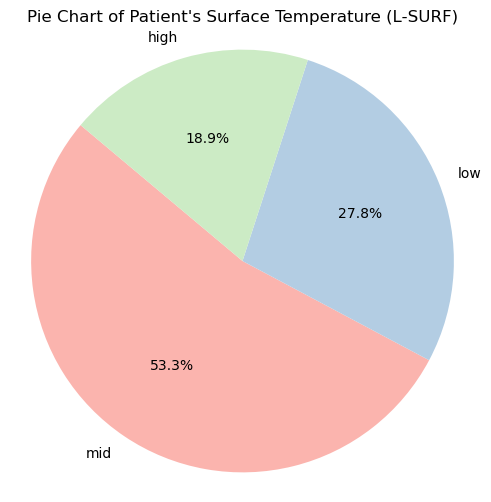

In [13]:
# Plot pie chart of patient's surface temperature in C - 2 Mark
import matplotlib.pyplot as plt
surf_temp_counts = df['L-SURF'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(surf_temp_counts, labels=surf_temp_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Pie Chart of Patient's Surface Temperature (L-SURF)")
plt.axis('equal')
plt.show()


In [14]:
#Prepare X - input matrix and y - label vector - 1 Mark
# Prepare input features and label
X = df.drop('ADM-DECS', axis=1)
y = df['ADM-DECS']

In [15]:
#Apply label encoder for categorical columns - 2 Marks
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])



In [16]:
# Split the data into train and test set  - use test size = 30% and random state = 4 : - 2 Marks
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [17]:
#Print train and test data size
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(63, 8)
(27, 8)
(63,)
(27,)


In [18]:
# Fit the Naive Bayes classifier on training data - 3 Marks
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [19]:
# Make prediction on test data - 1 Marks
y_pred = nb_classifier.predict(X_test)

In [20]:
# Check the evaluation metrics of the model - Confusion Matrix, Accuracy, Precision, Recall, F1 score - 3 Marks
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

prec = precision_score(y_test, y_pred, average='macro')
print("Precision:", prec)

rec = recall_score(y_test, y_pred, average='macro')
print("Recall:", rec)

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

Confusion Matrix:
 [[12  4  0]
 [ 0  0  0]
 [ 6  5  0]]
Accuracy: 0.4444444444444444
Precision: 0.2222222222222222
Recall: 0.25
F1 Score: 0.23529411764705885


/home/rgukt-basar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rgukt-basar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Confusion Matrix:
 [[12  4  0]
 [ 0  0  0]
 [ 6  5  0]]
Accuracy: 0.4444444444444444


In [22]:
#Apply prediction on any one sample input and print the probability estimates for each class - 1 marks
sample = X_test.iloc[0:1] 
predicted_class = nb_classifier.predict(sample)
print("Predicted Class:", predicted_class[0])
proba = nb_classifier.predict_proba(sample)
print("Probability Estimates:", proba)

Predicted Class: 0
Probability Estimates: [[0.93236091 0.         0.06763909]]
